<a href="https://colab.research.google.com/github/SHAIKHHUZEFA/basic-django-project/blob/master/Analysis%20and%20Prediction%20on-Female%20Diabetics%20Patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
                   #Analysis and Prediction on-Female Diabetics Patients

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
#import packages

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [0]:
#load the data

In [0]:
df=pd.read_csv('/gdrive/My Drive/diabetes.csv')

In [0]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
#explanation of features and label

In [0]:
#The following features have been provided to help us predict whether a person is diabetic or not:
  1)Pregnancies: Number of times pregnant

  2)Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test

  3)BloodPressure: Diastolic blood pressure (mm Hg)

  4)SkinThickness: Triceps skin fold thickness (mm)

  5)Insulin: 2-Hour serum insulin (mu U/ml)

  6)BMI: Body mass index (weight in kg/(height in m)2)

  7)DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)

  8)Age: Age (years)

  9)Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

In [0]:
#check the size and shape of the data

In [0]:
df.size

6912

In [0]:
df.shape

(768, 9)

In [0]:
#check weather the data has null value or not

In [0]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [0]:
#there is no null value..i.e data is already clean

In [0]:
#describe the data

In [0]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [0]:
#check the data types weather it is int,float or object.if it is in object convert into int or float

In [0]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [0]:
# checking the balance of the data by plotting the count of outcomes by their value

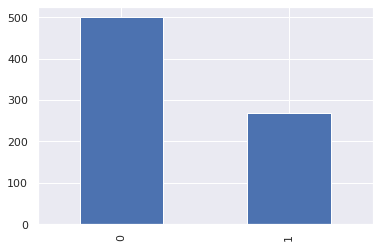

In [0]:
df=df.Outcome.value_counts().plot(kind="bar")

In [0]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [0]:
#data is unbalace, so at the end of the program we will check the prescion and recall

In [0]:
#check the correlation

In [0]:
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [0]:
#draw the plot to check the relation between data

In [0]:
import seaborn as sns

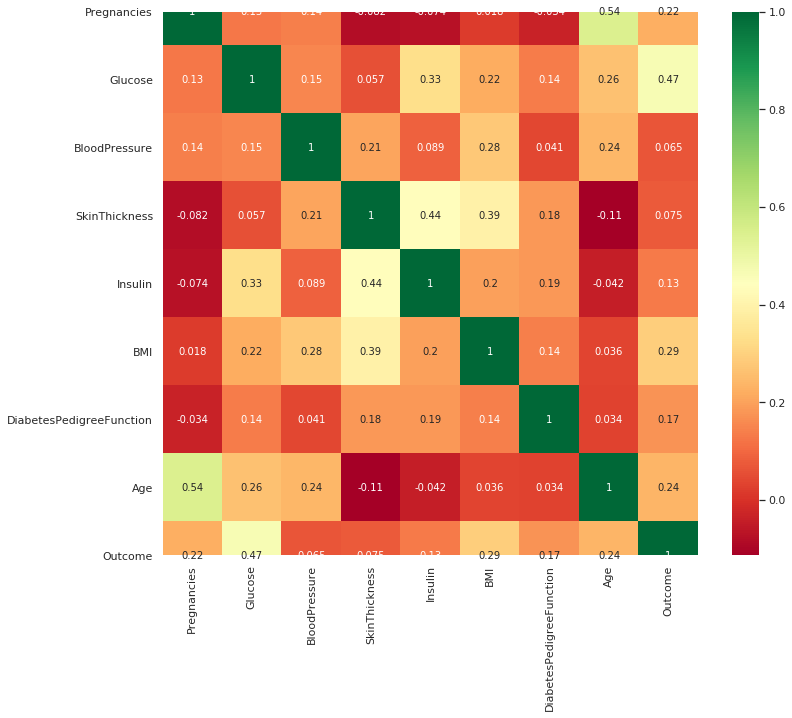

In [0]:
plt.figure(figsize=(12,10))
df=sns.heatmap(df.corr(),annot=True,cmap ='RdYlGn') 

In [0]:
#above diagram shows the relation between each other

In [0]:
#draw the histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d6792a3c8>,
      dtype=object)

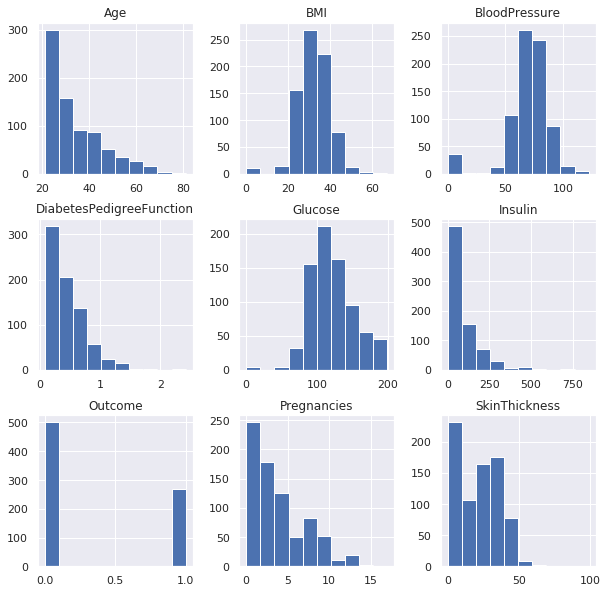

In [0]:
df.hist(figsize=(10, 10))

In [0]:
df.DiabetesPedigreeFunction.value_counts()

0.254    6
0.258    6
0.259    5
0.238    5
0.207    5
        ..
0.886    1
0.804    1
1.251    1
0.382    1
0.375    1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64

In [0]:
Logistic Regression:
This is a statistical technique most commonly used in scenarios where the outcome variable
is categorical. It is used for binary as well as multinomial classifications. The purpose of
conducting logistic regression is to create a model for getting a biomarker. If a model is in
place, one could use the model to assess the chances of diabetes or not. Logistic regression
model looks like below:


In [0]:
#split the data into train and test and predict the model using logistic regression
#also check weather the model is genralized or not

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(df.drop(labels=['Outcome',],axis=1),df[['Outcome']],test_size=0.2,random_state=57)

In [0]:
X_train.size

4912

In [0]:
X_test.size

1232

In [0]:
model1=LogisticRegression()

In [0]:
model1.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pred=model1.predict(X_test)

In [0]:
pred

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [0]:
print(model1.score(X_train,Y_train))

0.758957654723127


In [0]:
print(model1.score(X_test,Y_test))

0.8311688311688312


In [0]:
#after using the brute force technique we got the best model on random_state=57,,also we are getting test_score > train_score..
#so this model is genralized.so we will accept this model

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
#make the matrix to check the misclassification

In [0]:
cm=confusion_matrix(Y_test,pred)

In [0]:
cm

array([[95, 10],
       [16, 33]])

Text(0.5, 15.0, 'Predicted label')

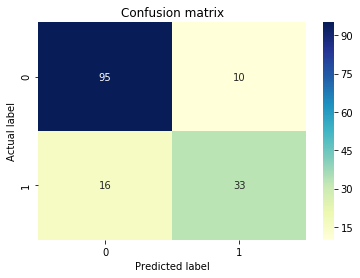

In [0]:
pred = model1.predict(X_test)
cm=confusion_matrix(Y_test,pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
#make the classification report to see the acc,presicion,recall

In [0]:
from sklearn.metrics import classification_report

In [0]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       105
           1       0.77      0.67      0.72        49

    accuracy                           0.83       154
   macro avg       0.81      0.79      0.80       154
weighted avg       0.83      0.83      0.83       154



In [0]:
acc=(cm[0,0]+cm[1,1])/Y_test.size

In [0]:
acc

0.8311688311688312

In [0]:
#find precision and recall for both

In [0]:
#precision=tp/tp+fp
#recall=fn/tp+fn

In [0]:
p0=95/111

In [0]:
p0

0.8558558558558559

In [0]:
p1=33/43

In [0]:
p1

0.7674418604651163

In [0]:
r0=95/105

In [0]:
r0

0.9047619047619048

In [0]:
r1=33/49

In [0]:
r1

In [0]:
#Use brute-force Technique
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(df.drop(labels=['Outcome'],axis=1),df[['Outcome']],
                                                test_size=0.2,
                                                random_state=i)
    model2 = LogisticRegression()
    model2.fit(X_train,Y_train)
    
    test_score = model2.score(X_test,Y_test)
    train_score = model2.score(X_train,Y_train)
    
    if test_score > train_score:
        print("Test Score {} Train Score {} Random {}".format(test_score,train_score,i))

Test Score 0.7792207792207793 Train Score 0.7719869706840391 Random 1
Test Score 0.8051948051948052 Train Score 0.7638436482084691 Random 4
Test Score 0.7857142857142857 Train Score 0.7736156351791531 Random 5
Test Score 0.8051948051948052 Train Score 0.7768729641693811 Random 6
Test Score 0.7922077922077922 Train Score 0.7768729641693811 Random 7
Test Score 0.7857142857142857 Train Score 0.7752442996742671 Random 8
Test Score 0.8051948051948052 Train Score 0.762214983713355 Random 12
Test Score 0.8246753246753247 Train Score 0.7654723127035831 Random 16
Test Score 0.7922077922077922 Train Score 0.7671009771986971 Random 19
Test Score 0.8116883116883117 Train Score 0.7703583061889251 Random 23
Test Score 0.8051948051948052 Train Score 0.760586319218241 Random 26
Test Score 0.7987012987012987 Train Score 0.7654723127035831 Random 28
Test Score 0.7857142857142857 Train Score 0.7768729641693811 Random 29
Test Score 0.8181818181818182 Train Score 0.7703583061889251 Random 30
Test Score 0.7

In [0]:
# when i keep the random state 1 then i got a 77 accyracy on test and train score, but when i use brute forece tech then i got a 83 acc

In [0]:
Support Vector Machines (SVM):
In machine learning, support vector machines are widely used learning models that analyse
data and are also used for classification and outline detection. In addition to performing
linear classification, SVMs can also perform non-linear classification. They can easily map the
data set with multiple features into a multi-dimensional space and this data is easily
separable. SVM use classification and regression kernel functions to achieve this explained
technique. 

In [0]:
#create model using svm also check weather the model is genralized or not

In [0]:
from sklearn.svm import SVC

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(df.drop(labels=['Outcome'],axis=1),df[['Outcome']],test_size=0.2,random_state=57)

In [0]:
model3=SVC(kernel='sigmoid',gamma=0.1)

In [0]:
model3.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
pred=model3.predict(X_test)

In [0]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
X_test.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
29,5,117,92,0,0,34.1,0.337,38
126,3,120,70,30,135,42.9,0.452,30
292,2,128,78,37,182,43.3,1.224,31
453,2,119,0,0,0,19.6,0.832,72
392,1,131,64,14,415,23.7,0.389,21
201,1,138,82,0,0,40.1,0.236,28
523,9,130,70,0,0,34.2,0.652,45
385,1,119,54,13,50,22.3,0.205,24
91,4,123,80,15,176,32.0,0.443,34
212,7,179,95,31,0,34.2,0.164,60


In [0]:
print(model3.score(X_train,Y_train))

0.6433224755700325


In [0]:
print(model3.score(X_test,Y_test))

0.6818181818181818


In [0]:
#when i use kernel=sigmoid then i got a accuracy less than 70 for training as well as testing so i reject this model

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(df.drop(labels=['Outcome'],axis=1),df[['Outcome']],test_size=0.2,random_state=82)

In [0]:
model4=SVC(kernel='linear',gamma=0.1)

In [0]:
model4.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
pred=model4.predict(X_test)

In [0]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
69,4,146,85,27,100,28.9,0.189,27
555,7,124,70,33,215,25.5,0.161,37
392,1,131,64,14,415,23.7,0.389,21
386,5,116,74,29,0,32.3,0.660,35
365,5,99,54,28,83,34.0,0.499,30


In [0]:
pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [0]:
model4.predict([[2,129,0,0,0,38.5,0.304,41]])

array([1])

In [0]:
print(model4.score(X_train,Y_train))

0.758957654723127


In [0]:
print(model4.score(X_test,Y_test))

0.8376623376623377


In [0]:
#when i use kernel=linear i got a got a good accuracy, for better acc i used the brute force technique so i got the best result on random_state=82 
#also test_score >train_score so this model is accepted

In [0]:
#Use brute-force Technique
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(df.drop(labels=['Outcome'],axis=1),df[['Outcome']],
                                                test_size=0.2,
                                                random_state=i)
    model5 = SVC(kernel='linear',gamma=0.1)
    model5.fit(X_train,Y_train)
    
    test_score = model5.score(X_test,Y_test)
    train_score = model5.score(X_train,Y_train)
    
    if test_score > train_score:
        print("Test Score {} Train Score {} Random {}".format(test_score,train_score,i))

Test Score 0.7792207792207793 Train Score 0.7703583061889251 Random 1
Test Score 0.7987012987012987 Train Score 0.7703583061889251 Random 4
Test Score 0.8051948051948052 Train Score 0.7703583061889251 Random 5
Test Score 0.7987012987012987 Train Score 0.7654723127035831 Random 6
Test Score 0.7922077922077922 Train Score 0.7785016286644951 Random 7
Test Score 0.8116883116883117 Train Score 0.7687296416938111 Random 12
Test Score 0.7987012987012987 Train Score 0.7703583061889251 Random 16
Test Score 0.7792207792207793 Train Score 0.7785016286644951 Random 19
Test Score 0.8051948051948052 Train Score 0.7719869706840391 Random 23
Test Score 0.7792207792207793 Train Score 0.7768729641693811 Random 25
Test Score 0.7857142857142857 Train Score 0.7638436482084691 Random 26
Test Score 0.8051948051948052 Train Score 0.7703583061889251 Random 28
Test Score 0.7857142857142857 Train Score 0.7687296416938111 Random 29
Test Score 0.7857142857142857 Train Score 0.7736156351791531 Random 30
Test Score 

In [0]:
#after using brute force technique we got the best result on random_state 82

In [0]:
#make confusion matrix to check the misclssification

In [0]:
cm1=confusion_matrix(Y_test,pred)

In [0]:
cm1

array([[99,  8],
       [17, 30]])

Text(0.5, 15.0, 'Predicted label')

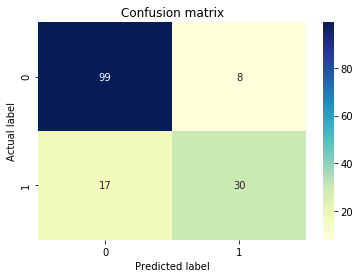

In [0]:
pred = model4.predict(X_test)
cm1=confusion_matrix(Y_test,pred)
p = sns.heatmap(pd.DataFrame(cm1), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
#print classification report to check the acc,prescion and recall

In [0]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       107
           1       0.79      0.64      0.71        47

    accuracy                           0.84       154
   macro avg       0.82      0.78      0.80       154
weighted avg       0.83      0.84      0.83       154



In [0]:
acc=(cm1[0,0]+cm[1,1])/Y_test.size

In [0]:
acc

In [0]:
#find the presicion and recall

In [0]:
p0=99/116

In [0]:
p0

0.853448275862069

In [0]:
p1=30/38

In [0]:
p1

0.7894736842105263

In [0]:
r0=99/107

In [0]:
r0

0.9252336448598131

In [0]:
r1=30/47

In [0]:
r1

0.6382978723404256

In [0]:
Random Forest and desicion tree Method:
The random forest method for regression and classification create multitude of decision
trees at training time and outputs the class that is the mode of the classification or regression
of the individual trees. Decision tree is a graph that appears like a tree or decision model with
the possible results. Random forest is like a collection of multiple decision trees. First in
random forest random sample of data is picked up by each tree and each tree is trained
separately independent of each other. This level is at the row level. After this the data is
trained at the column level. Each decision tree again gets certain set of columns. To declare
the result, results from each tree are taken and majority ones are selected. Average and
voting are done in this process. Random forest method decreases the chance of overfitting of
the data by decreasing the variance since so many decision trees are in work.

In [0]:
#use desicion tree method
#also check weather the model is genarlized or not


In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(df.drop(labels=['Outcome'],axis=1),df[['Outcome']],test_size=0.2,random_state=1)

In [0]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz

In [0]:
model6=DecisionTreeClassifier(max_depth=100,max_leaf_nodes=100,max_features=8)

In [0]:
model6.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
                       max_features=6, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
pred=model6.predict(X_test)

In [0]:
print(model6.score(X_train,Y_train))

0.9853420195439739


In [0]:
print(model6.score(X_test,Y_test))

0.6623376623376623


In [0]:
# after using tree method none test score > train score,also i change the feature like 6 n 7..still didnt get the good accuracy,so i rejected this model

In [0]:
#use brute force technique

In [0]:
#Use brute-force Technique
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(df.drop(labels=['Outcome'],axis=1),df[['Outcome']],
                                                test_size=0.2,
                                                random_state=i)
    model7=DecisionTreeClassifier(max_depth=100,max_leaf_nodes=100,max_features=8)
    model7.fit(X_train,Y_train)
    
    test_score = model7.score(X_test,Y_test)
    train_score = model7.score(X_train,Y_train)
    
    if test_score > train_score:
        print("Test Score {} Train Score {} Random {}".format(test_score,train_score,i))

In [0]:
#use random forest
#also chexk weather the model is genralized or not

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(df.drop(labels=['Outcome'],axis=1),df[['Outcome']],test_size=0.2,random_state=1)

In [0]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor

In [0]:
model8=RandomForestClassifier(max_features=8,min_samples_split=7,n_estimators=4)

In [0]:
model8.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
pred=model8.predict(X_test)

In [0]:
print(model8.score(X_train,Y_train))

0.9413680781758957


In [0]:
print(model8.score(X_test,Y_test))

0.7792207792207793


In [0]:
# after using random forest  none of test score> train score,also i change the feature like 6 n 7.. 
#also i changed the n--estimator still didnt get the good accuracy,so i rejected this model.

In [0]:
#use brute force technique

In [0]:
#Use brute-force Technique
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(df.drop(labels=['Outcome'],axis=1),df[['Outcome']],
                                                test_size=0.2,
                                                random_state=i)
    model9=RandomForestClassifier(max_features=8,min_samples_split=7,n_estimators=4)
    model9.fit(X_train,Y_train)
    
    test_score = model9.score(X_test,Y_test)
    train_score = model9.score(X_train,Y_train)
    
    if test_score > train_score:
        print("Test Score {} Train Score {} Random {}".format(test_score,train_score,i))

In [0]:
#after using the 4 packages i.e Logistic regressin,Svm,desicion tree,random forest,we got the genaralized model for onlt logistic regression and Svm
#so we accept the Logistic and svm model and we reject the desicion tree and random forest

In [0]:
#after using logistic regression we got the
test_score=0.8311
train_score=0.7589

In [0]:
#after using SVM we got the
test_score=0.8376
train_score=0.7589

In [0]:
#after comparing between svm and logistic regression , we got the good prescion and recall in SVM so at the end will select the svm model 

In [0]:
#comparision between svm and logistic matrix
# svm confusion matrix

Text(0.5, 15.0, 'Predicted label')

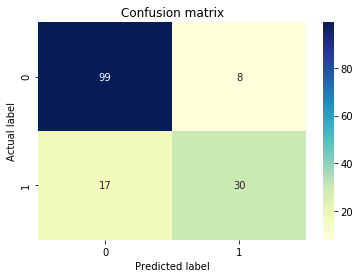

In [0]:
pred = model4.predict(X_test)
cm1=confusion_matrix(Y_test,pred)
p = sns.heatmap(pd.DataFrame(cm1), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       107
           1       0.79      0.64      0.71        47

    accuracy                           0.84       154
   macro avg       0.82      0.78      0.80       154
weighted avg       0.83      0.84      0.83       154



In [0]:
# logistic regression matrix

Text(0.5, 15.0, 'Predicted label')

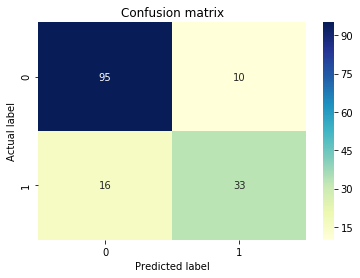

In [0]:
pred = model1.predict(X_test)
cm=confusion_matrix(Y_test,pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       105
           1       0.77      0.67      0.72        49

    accuracy                           0.83       154
   macro avg       0.81      0.79      0.80       154
weighted avg       0.83      0.83      0.83       154



In [0]:
We have increased the classification performance in the dataset using the 
SVM (83.76%), Logistic Regression Method (83.11%) Random Forest (77.92%),and Decision Tree(66.23%) using machine learning methods. 